# init

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from pymfe.mfe import MFE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import sklearn.metrics as skm
from sklearn import metrics
import pdb

stdTable = "./data/recommender/std-table.csv"
path_arff = "./data/datasets/arff/"
path_index = "./data/index/arff/"
# files_arff = os.listdir(path_arff)

path = "./data/experimento/datasets/selected/cleaned/"
tablePath = savePath = "./data/recommender/meta-features.csv"

ccTable = "./metafeatures/meta-table-CC.csv"
accTable = "./metafeatures/meta-table-ACC.csv"
smmTable = "./metafeatures/meta-table-SMM.csv"
hdyTable = "./metafeatures/meta-table-HDy.csv"
dysTable = "./metafeatures/meta-table-DyS.csv"
sordTable = "./metafeatures/meta-table-SORD.csv"
msTable = "./metafeatures/meta-table-MS.csv"
# ms2Table = "./metafeatures/meta-table-MS2.csv"
maxTable = "./metafeatures/meta-table-MAX.csv"
xTable = "./metafeatures/meta-table-X.csv"
t50Table = "./metafeatures/meta-table-T50.csv"

algList = ["CC","ACC","SMM","HDy","DyS","SORD","MS","MAX","X","T50"]
pathList = [ccTable, accTable, smmTable, hdyTable, dysTable, sordTable, msTable, maxTable, xTable, t50Table]

datasets_path = './datasets/'
files = os.listdir(datasets_path)

# preprocess

In [2]:
tableList = []

for path in pathList:
  table = pd.read_csv(path)
  # table.drop(82, inplace = True)
  data = table.values
  X, y = data[:, :-1], data[:, -1]
  np.nan_to_num(X, copy=False)
  row, column = np.where(X > np.finfo(np.float32).max)
  for i in range(len(row)):
    X[row[i]][column[i]] = np.finfo(np.float32).max
  # print(str(path) + '\thas NaN: ' + str(np.isnan(y).any()))
  
  tableList.append((X, y))

# experiment

In [3]:
# data = []
# model = RandomForestRegressor(n_estimators=500, random_state=42)

# instance_len = len(tableList[0][0])
# results = {}
# j = 0
# for (X, y) in tableList:
#   resultsList = []
#   algName = algList[j]
#   j += 1

#   # # ### DELETE DELETE DELETE
#   # instance_counter = 0 # DELETE
#   # # ### DELETE DELETE DELETE

#   for i in range(0, len(X)):
#     X_train = np.delete(X, i, 0)
#     y_train = np.delete(y, i, 0)

#     X_test = X[i]
#     X_test = X_test.reshape(1, -1)
#     y_test = y[i]

#     model.fit(X_train, y_train)
#     abs_error = model.predict(X_test)

#     resultsList.append([y_test, abs_error[0]])
#     # # ### DELETE DELETE DELETE
#     # instance_counter += 1 # DELETE
#     # if instance_counter > 4: # DELETE
#     #   break
#     # # ### DELETE DELETE DELETE
#   results[algName] = resultsList

# cols = []
# for key in results:
#   cols.append('abs-error-'+key)
#   cols.append('abs-error-'+key+'-predicted')
# cols.append('abs-error-ideal')
# cols.append('quantifier-ideal')
# cols.append('quantifier-ideal-num')
# cols.append('abs-error-recommended')
# cols.append('quantifier-recommended')
# cols.append('quantifier-recommended-num')
# i = 1
# for key in results:
#     cols.append('rank-' + str(i))
#     i += 1
# i = 0

# # # ### DELETE DELETE DELETE
# # instance_len = 5 ### DELETE
# # # ### DELETE DELETE DELETE

# for i in range(0, instance_len):
#   abs_error_ideal = 2
#   quantifier_ideal = 'NULL'
#   quantifier_ideal_num = -1
#   abs_error_recommended = 2
#   quantifier_recommended = 'NULL'
#   quantifier_recommended_num = -1
#   row = []
#   algNum = 0
#   rank = {}

#   for a in algList:
#     row.append(results[a][i][0])
#     row.append(results[a][i][1])

#     rank[algNum] = results[a][i][1]

#     if results[a][i][0] < abs_error_ideal:
#       abs_error_ideal = results[a][i][0]
#       quantifier_ideal = a
#       quantifier_ideal_num = algNum

#     if results[a][i][1] < abs_error_recommended:
#       abs_error_recommended = results[a][i][1]
#       quantifier_recommended = a
#       quantifier_recommended_num = algNum

#     algNum += 1
#   rank = sorted(rank.items(), key=lambda item: item[1])

#   row.append(abs_error_ideal)
#   row.append(quantifier_ideal)
#   row.append(quantifier_ideal_num)
#   row.append(abs_error_recommended)
#   row.append(quantifier_recommended)
#   row.append(quantifier_recommended_num)
#   for key in rank:
#     row.append(int(key[0]))

#   data.append(row)

# table = pd.DataFrame(data, columns = cols)
# table

# # # table.to_csv("drive/My Drive/Mestrado/data/recommendation table/recommendation-table.csv", index = False)

In [4]:
# # # table.to_csv("./recommendation/recommendation-table.csv", index = False)

In [5]:
# table.columns

In [6]:
ccTable = pd.read_csv("./metafeatures/meta-table-CC.csv")
ccTable

,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,best_node.mean,best_node.sd,can_cor.mean,can_cor.sd,cat_to_num,...,tree_shape.mean,tree_shape.sd,var.mean,var.sd,var_importance.mean,var_importance.sd,w_lambda,worst_node.mean,worst_node.sd,abs-error
0,0.007269,0.017647,0.631615,0.861751,0.010302,0.751864,0.000694,0.597873,NaN,0.0,...,0.007444,0.032127,1.758108e+03,5.348884e+03,0.021277,0.042660,0.642548,0.751864,0.000694,0.2238
1,0.095097,0.078190,2.384059,0.724339,0.021680,0.550075,0.108475,0.340004,NaN,0.0,...,0.051468,0.061130,3.788357e+04,8.105067e+04,0.125000,0.073725,0.884397,0.549925,0.050309,0.1833
2,0.104190,0.137275,2.778513,0.826562,0.025377,0.877922,0.002549,0.568092,NaN,0.0,...,0.051123,0.073781,1.062806e+08,6.441865e+08,0.027027,0.050650,0.677272,0.877922,0.002549,0.2978
3,0.122956,0.168782,2.895666,0.688203,0.023672,0.897632,0.000316,0.444716,NaN,0.0,...,0.036728,0.067949,3.478069e+09,2.108782e+10,0.027027,0.028822,0.802228,0.897632,0.000316,0.4364
4,0.246779,0.138278,2.103681,0.365779,0.242236,0.678676,0.110759,0.635978,NaN,0.0,...,0.107405,0.149130,5.440377e+08,3.386298e+09,0.025641,0.035552,0.595533,0.670956,0.040171,0.3335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.066503,0.143482,1.433411,1.154699,0.003424,0.847234,0.058235,0.840637,NaN,0.0,...,0.006445,0.016943,1.162070e-01,1.759965e-01,0.008475,0.043173,0.293329,0.713247,0.020773,0.0349
129,0.087823,0.055911,4.227206,1.112336,0.000243,0.988716,0.008529,0.933289,NaN,0.0,...,0.027766,0.054636,2.823067e+04,4.288112e+04,0.200000,0.420785,0.128971,0.754815,0.044758,0.0060
130,0.057846,0.026967,4.025713,0.138075,0.000925,0.753702,0.018135,0.497794,NaN,0.0,...,0.012406,0.029655,1.000000e+00,1.358110e-08,0.200000,0.091257,0.752201,0.739454,0.009501,0.0839
131,0.051535,0.111595,1.130098,0.993315,0.012389,0.772014,0.055839,0.748289,NaN,0.0,...,0.016789,0.048415,7.134779e+03,4.886466e+04,0.017544,0.048846,0.440064,0.611825,0.013898,0.0361


In [7]:
table = pd.read_csv("./recommendation/recommendation-table.csv")

In [8]:
rows = table['abs-error-DyS'].to_list()
dys = []
i = 0
for r in rows:
    dys.append(table.loc[i]['abs-error-DyS'])
    i += 1


rows = table['quantifier-recommended'].to_list()
rec = []
i = 0
for r in rows:
    rec.append(table.loc[i]['abs-error-' + r])
    i += 1

rows = table['quantifier-ideal'].to_list()
rec2 = []
i = 0
for r in rows:
    rec2.append(table.loc[i]['abs-error-' + r])
    i += 1

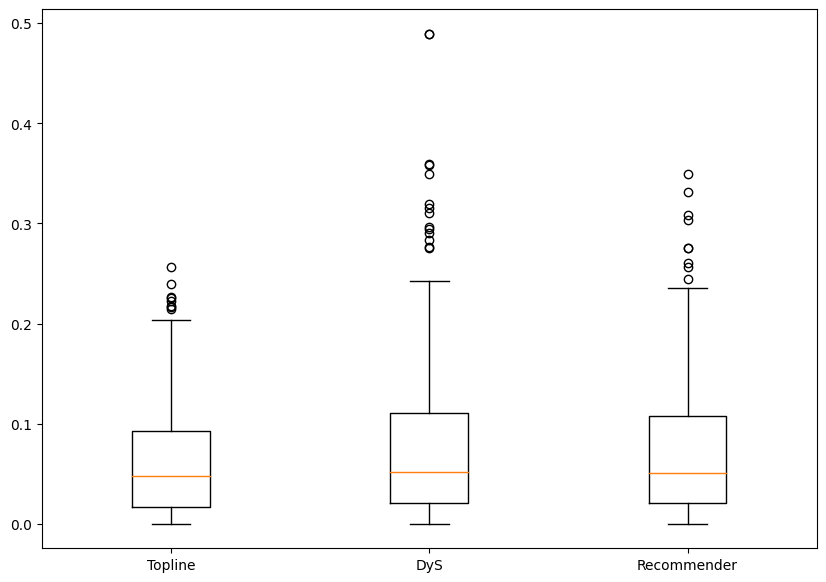

In [9]:
import matplotlib.pyplot as plt
import numpy as np
 
data = [rec2, dys, rec]
  
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
plt.xticks([1,2,3], ['Topline', 'DyS', 'Recommender'])
 
# show plot
plt.show()

Text(0.5, 0, 'Top N')

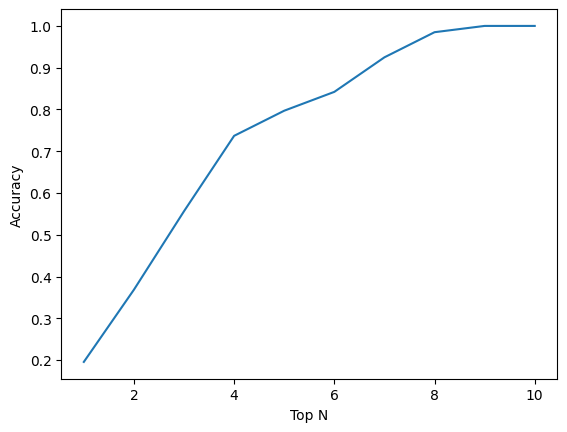

In [10]:
x_axis = [] 
y_axis = []
top = len(pathList)

for j in range(1, top+1):
  ideal = table['quantifier-ideal-num'].values
  pred = []
  i = 1
  for i in range(1, j+1):
    pred.append(table['rank-'+str(i)].values.tolist())
  pred = np.array(pred).T.tolist()
  mat = []

  i = 0
  for row in pred:
    correct = False
    for element in row:
      if ideal[i] == element:
        correct = True
        break
    mat.append(correct)
    i += 1

  x_axis.append(np.count_nonzero(mat) / len(mat))
  y_axis.append(j)

plt.plot(y_axis, x_axis)
plt.ylabel('Accuracy')
plt.xlabel('Top N')

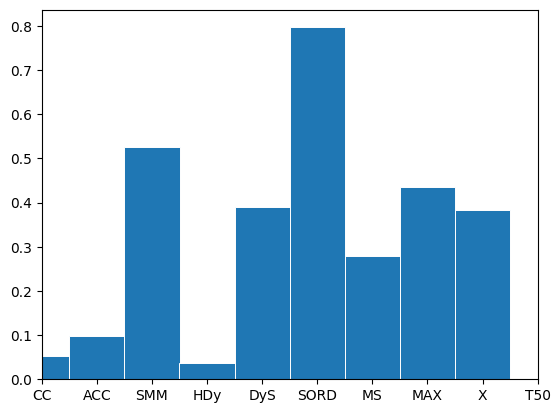

In [55]:
top = 3

x_axis = [0] * len(pathList)
y_axis = algList

for i in range(0, top):
    rank = table.value_counts('rank-' + str(i+1))
    for a in rank.index:
        x_axis[a] += rank[a]

x_axis = np.array(x_axis) / len(table)

fig, ax = plt.subplots()
ax.bar(y_axis, x_axis, width=1, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 9))
plt.show()

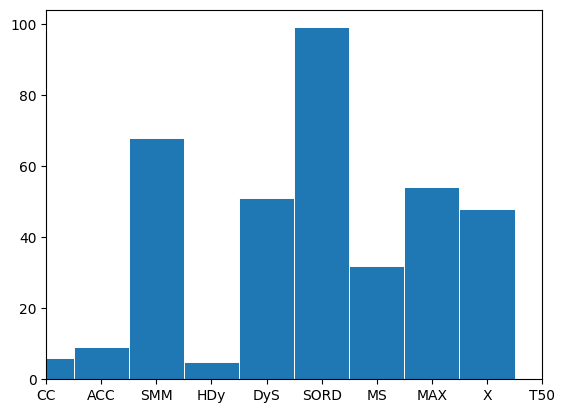

124


In [57]:
top = 3
auc_max = 1

table_copy = table.copy(deep=True)
auc = pd.read_csv("./auc/auc_score.csv")
auc = auc['auc_score'].values.tolist()

for i in range(0, len(auc)):
    if auc[i] >= auc_max:
        table_copy.drop(i, inplace = True)
table_copy.reset_index(drop=True, inplace=True)

x_axis = [0] * len(pathList)
y_axis = algList

for i in range(0, top):
    rank = table_copy.value_counts('rank-' + str(i+1))
    for a in rank.index:
        x_axis[a] += rank[a]

fig, ax = plt.subplots()
ax.bar(y_axis, x_axis, width=1, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 9))
plt.show()

print(len(table_copy))

10


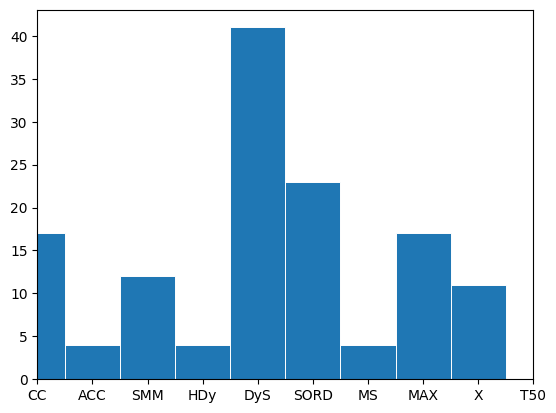

In [53]:
x_axis = [0] * len(pathList)
y_axis = algList
qnt = table['quantifier-ideal-num'].values

for a in qnt:
    x_axis[a] += 1

fig, ax = plt.subplots()
ax.bar(y_axis, x_axis, width=1, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 9))
plt.show()

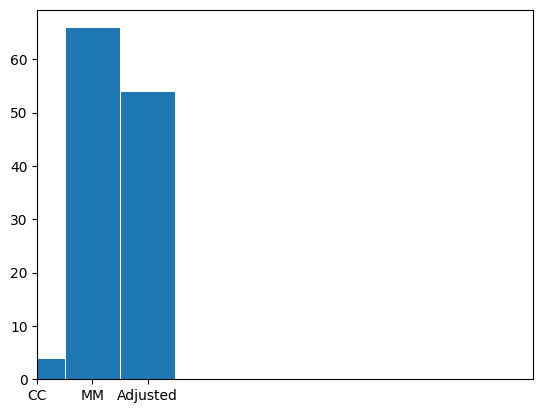

124


In [59]:
top = 1
auc_max = 1

table_copy = table.copy(deep=True)
auc = pd.read_csv("./auc/auc_score.csv")
auc = auc['auc_score'].values.tolist()

for i in range(0, len(auc)):
    if auc[i] >= auc_max:
        table_copy.drop(i, inplace = True)
table_copy.reset_index(drop=True, inplace=True)

x_axis = [0] * 3
y_axis = ['CC', 'MM', 'Adjusted']

for i in range(0, top):
    rank = table_copy.value_counts('rank-' + str(i+1))
    for a in rank.index:
        if a == 0:
            x_axis[0] += rank[a]
        elif a == 2 or a == 3 or a == 4 or a == 5:
            x_axis[1] += rank[a]
        else:
            x_axis[2] += rank[a]

fig, ax = plt.subplots()
ax.bar(y_axis, x_axis, width=1, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 9))
plt.show()

print(len(table_copy))

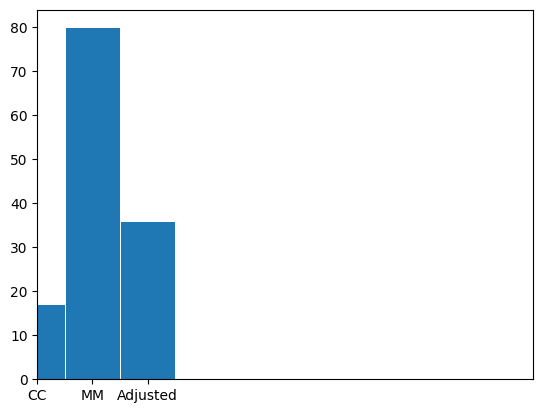

In [60]:
x_axis = [0] * 3
y_axis = ['CC', 'MM', 'Adjusted']
qnt = table['quantifier-ideal-num'].values

for a in qnt:
    if a == 0:
        x_axis[0] += 1
    elif a == 2 or a == 3 or a == 4 or a == 5:
        x_axis[1] += 1
    else:
        x_axis[2] += 1

fig, ax = plt.subplots()
ax.bar(y_axis, x_axis, width=1, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 9))
plt.show()

In [12]:
# i = 0
# dataframe = None
# X = None
# y = None
# X_list = []
# y_list = []

# for f in files:
#   if i == 14 or i == 16 or i == 21 or i == 25 or i == 33 or i == 68 or i == 69 or i == 70 or i == 71 or i == 72 or i == 73 or i == 74 or i == 75 or i == 76 or i == 82 or i == 88 or i == 98 or i == 104 or i == 109 or i == 115 or i == 118 or i == 119 or i == 120 or i == 128 or i == 129 or i == 130 or i == 132 or i == 139:
#     i += 1
#     continue
  
#   df = pd.read_csv(datasets_path + f)
#   df = df.dropna()

#   y = df.pop(df.columns[-1])
#   X = df

#   y_list.append(y.to_numpy())
#   X_list.append(X.to_numpy())

#   i += 1
# i = 0

# auc_list = []
# clf = RandomForestClassifier(n_estimators=500, random_state=42)
# for i in range(0, len(X_list)):
#   X = X_list[i]
#   y = y_list[i]

#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#   try:
#     clf.fit(X_train, y_train)

#     y_prediction_proba = clf.predict_proba(X_test)[:, 1]

#     # print(metrics.roc_auc_score(y_test, y_prediction_proba))

#     auc_list.append(metrics.roc_auc_score(y_test, y_prediction_proba))
#   except Exception as e:
#     print('Skipping ' + str(i) + '...\t\t\t' + str(e) + '\n')
# # auc_list
# auc = pd.DataFrame(data={'auc_score': auc_list})
# auc.to_csv('./auc/auc_score.csv', index=False)

In [14]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# paux = table['quantifier-recommended-num'].T
# taux = table['quantifier-ideal-num'].T
# paux = paux.values
# taux = taux.values

# predicted = []
# true = []

# for i in range(0, len(paux)):
#   predicted.append(int(paux[i]))
#   true.append(int(taux[i]))

# cm = confusion_matrix(true, predicted)
# cm

In [15]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=algList)

# disp.plot()

# plt.show()